# Tutorials for using the codegreen_core package. 

<hr>

This tutorial has many independent parts demonstrating various ways to use the package, including getting energy data, analyzing it, and using the available tools.

## Prerequisite

Before starting this tutorial, ensure that the package is successfully installed and configured.
You can find the setup details [here](https://codegreen-framework.github.io/codegreen-core/installation.html).

## Gathering energy data

Lets start by finding out  how much energy was produced in Germany in January 2025

In [2]:
from codegreen_core.data import energy
from datetime import datetime
import matplotlib.pyplot as plt

In [3]:
de1 = energy("DE",datetime(2025,1,1),datetime(2025,1,31),"generation")

The 2 main components of  `de_jan25` are `data` (a dataframe) and `columns` (the list of columns categories)

In [4]:
de1["columns"]

{'renewable': ['Waste',
  'Geothermal',
  'Hydro Run-of-river and poundage',
  'Wind Onshore',
  'Hydro Pumped Storage',
  'Biomass',
  'Hydro Water Reservoir',
  'Other renewable',
  'Solar',
  'Wind Offshore'],
 'nonRenewable': ['Fossil Gas',
  'Other',
  'Fossil Brown coal/Lignite',
  'Fossil Hard coal',
  'Fossil Oil',
  'Fossil Coal-derived gas'],
 'percentage': ['Wind_per',
  'Solar_per',
  'Nuclear_per',
  'Hydroelectricity_per',
  'Geothermal_per',
  'Natural Gas_per',
  'Petroleum_per',
  'Coal_per',
  'Biomass_per']}

In [5]:
de1["data"]

,startTime,startTimeUTC,Biomass,Fossil Brown coal/Lignite,Fossil Coal-derived gas,Fossil Gas,Fossil Hard coal,Fossil Oil,Geothermal,Hydro Pumped Storage,...,percentRenewableWS,Wind_per,Solar_per,Nuclear_per,Hydroelectricity_per,Geothermal_per,Natural Gas_per,Petroleum_per,Coal_per,Biomass_per
group_id,,,,,,,,,,,,,,,,,,,,,
0,2025-01-01 00:00:00+01:00,202412312300,3957.75,3269.50,595.75,4692.50,2806.50,382.0,27.0,458.00,...,66,66,0,0,3,0,9,0,11,7
1,2025-01-01 01:00:00+01:00,202501010000,3901.75,3739.25,570.00,4327.50,2719.00,382.0,27.0,144.25,...,67,67,0,0,2,0,8,0,11,7
2,2025-01-01 02:00:00+01:00,202501010100,3879.25,3265.00,538.00,4217.75,2717.00,382.0,27.0,1.00,...,69,68,0,0,2,0,8,0,10,7
3,2025-01-01 03:00:00+01:00,202501010200,3850.25,3226.50,494.50,4279.50,2639.00,382.0,27.0,97.00,...,68,67,0,0,2,0,9,0,11,7
4,2025-01-01 04:00:00+01:00,202501010300,3809.00,3237.50,474.00,4335.00,2583.25,382.0,27.0,3.25,...,68,67,0,0,2,0,9,0,11,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
715,2025-01-30 19:00:00+01:00,202501301800,4548.50,10649.75,369.50,14320.50,6380.00,366.0,27.0,2851.00,...,26,26,0,0,7,0,25,0,30,8
716,2025-01-30 20:00:00+01:00,202501301900,4486.25,10623.00,332.75,13967.50,6354.00,366.0,27.0,1289.00,...,30,29,0,0,4,0,25,0,30,7
717,2025-01-30 21:00:00+01:00,202501302000,4394.00,10607.25,350.75,12322.25,6247.00,366.0,27.0,337.75,...,32,32,0,0,3,0,23,0,30,8


Let's find out answers to some questions like :

- What is the total amount of energy produced in Germany in January 2025?
- What percentage of this energy was generated from renewable sources?

We'll visualize the data to explore and answer these questions


**Total energy produced from renewable and non renewable sources**

In [9]:
total_renewable = de1["data"][de1["columns"]["renewable"]].sum().sum()  # first sum each renewable, then take their sum 
total_non_renewable = de1["data"][de1["columns"]["nonRenewable"]].sum().sum()
print(total_renewable,"MW")
print(total_non_renewable,"MW")

22194884.0 MW
18472372.25 MW


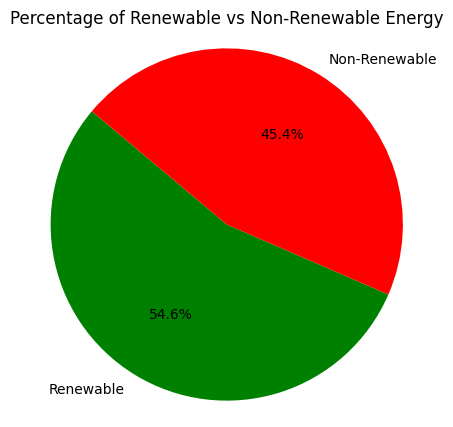

In [22]:
plt.figure(figsize=(5, 5))
plt.pie([total_renewable, total_non_renewable], labels=["Renewable", "Non-Renewable"], autopct='%1.1f%%', colors=["green", "red"], startangle=140)
plt.title("Percentage of Renewable vs Non-Renewable Energy")
plt.axis("equal")
plt.show()

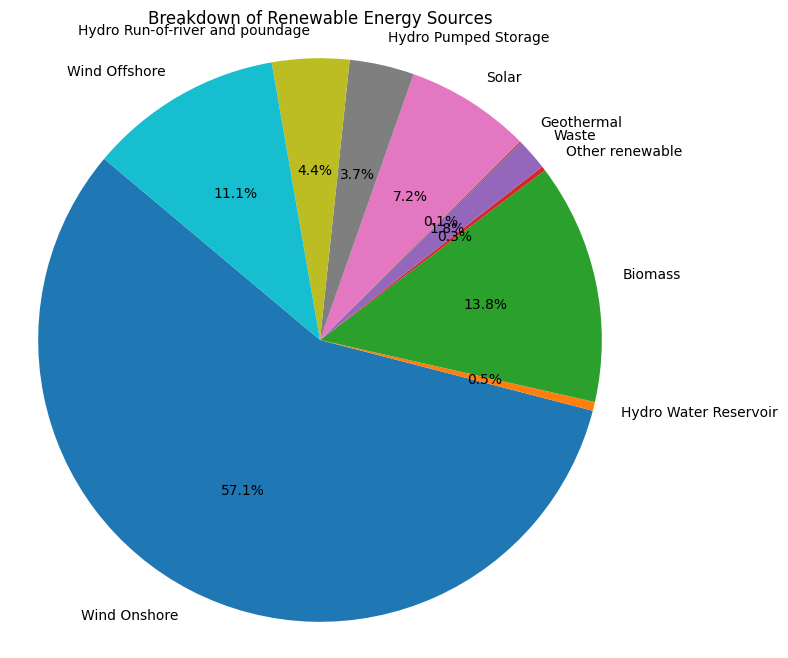

In [23]:
plt.figure(figsize=(8,8))
plt.pie(de1["data"][de1["columns"]["renewable"]].sum(), labels=de1["columns"]["renewable"], autopct='%1.1f%%', startangle=140)
plt.title("Breakdown of Renewable Energy Sources")
plt.axis("equal")
plt.show()

We can also observe the trend of energy generation from renewable sources as a time series 

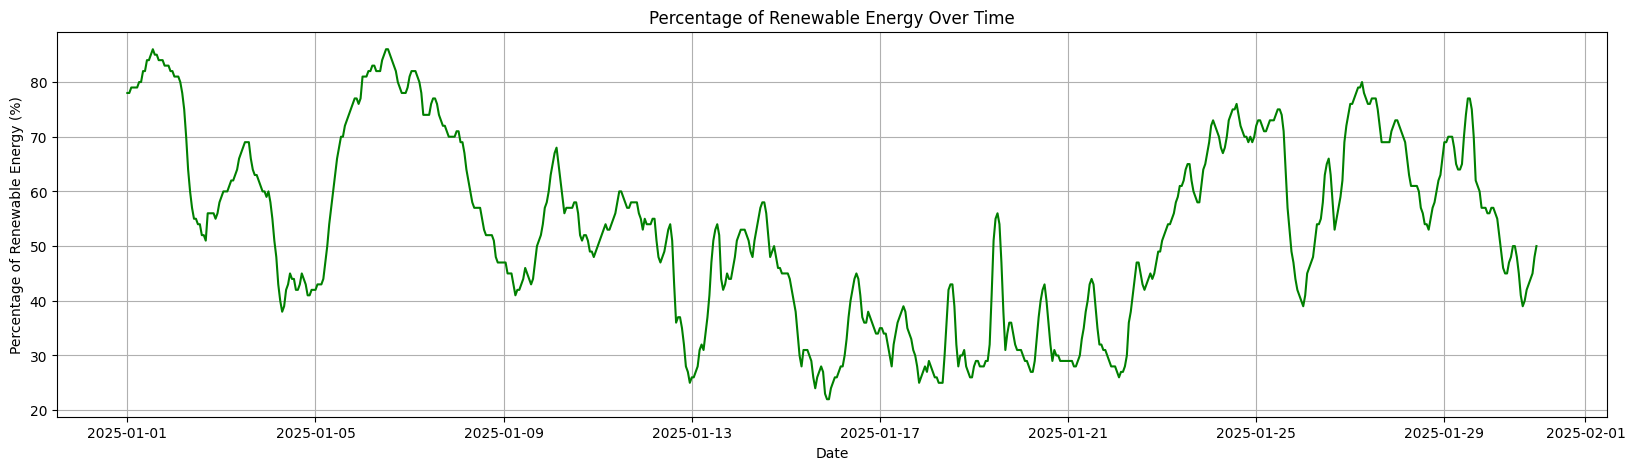

In [31]:
# Line chart for percentageRen
plt.figure(figsize=(20, 5))
plt.plot(de1["data"]["startTime"], de1["data"]["percentRenewable"], linestyle="-", color="green")
plt.xlabel("Date")
plt.ylabel("Percentage of Renewable Energy (%)")
plt.title("Percentage of Renewable Energy Over Time")
plt.grid(True)
plt.show()

## Finding the Carbon Intensity of energy

Next, we investigate the carbon emissions due to energy production. One way to quantify this value is by calculating carbon intersity.

Different sources of energy generation emit varying amounts of carbon, with renewable sources producing less carbon than fossil fuels. The carbon intensity of electricity generated at any point is the weighted sum of the base carbon emissions from each source, based on the proportion of energy contributed by each source.

`codegreen_core` package provides a tool to calculate carbon intensity using the energy data we fetched earlier.

In [10]:
from codegreen_core.tools.carbon_intensity import compute_ci_from_energy

In [11]:
ci1 =  compute_ci_from_energy(de1["data"])

In [12]:
ci1

,ci_codecarbon,ci_ipcc_lifecycle_min,ci_ipcc_lifecycle_mean,ci_ipcc_lifecycle_max,ci_eu_comm,startTime,startTimeUTC,Biomass,Fossil Brown coal/Lignite,Fossil Coal-derived gas,...,Wind_per,Solar_per,Nuclear_per,Hydroelectricity_per,Geothermal_per,Natural Gas_per,Petroleum_per,Coal_per,Biomass_per,ci_default
0,194.26,149.53,176.56,300.48,157.33,2025-01-01 00:00:00+01:00,202412312300,3957.75,3269.50,595.75,...,66,0,0,3,0,9,0,11,7,176.56
1,186.83,145.50,171.53,272.44,153.00,2025-01-01 01:00:00+01:00,202501010000,3901.75,3739.25,570.00,...,67,0,0,2,0,8,0,11,7,171.53
2,177.14,138.17,163.45,263.79,143.41,2025-01-01 02:00:00+01:00,202501010100,3879.25,3265.00,538.00,...,68,0,0,2,0,8,0,10,7,163.45
3,194.26,149.59,176.44,278.94,157.25,2025-01-01 03:00:00+01:00,202501010200,3850.25,3226.50,494.50,...,67,0,0,2,0,9,0,11,7,176.44
4,194.26,149.59,176.44,278.94,157.25,2025-01-01 04:00:00+01:00,202501010300,3809.00,3237.50,474.00,...,67,0,0,2,0,9,0,11,7,176.44
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
715,492.83,356.52,411.97,653.73,406.64,2025-01-30 19:00:00+01:00,202501301800,4548.50,10649.75,369.50,...,26,0,0,7,0,25,0,30,8,411.97
716,492.83,352.96,406.75,582.54,405.75,2025-01-30 20:00:00+01:00,202501301900,4486.25,10623.00,332.75,...,29,0,0,4,0,25,0,30,7,406.75
717,478.49,348.73,401.90,555.46,398.04,2025-01-30 21:00:00+01:00,202501302000,4394.00,10607.25,350.75,...,32,0,0,3,0,23,0,30,8,401.90
718,456.98,336.72,387.42,515.78,385.54,2025-01-30 22:00:00+01:00,202501302100,4385.00,10414.25,347.25,...,36,0,0,2,0,20,0,30,8,387.42


The data includes carbon intensity values calculated using various base values obtained from different sources.
You'll also find a "ci_default" column (located at the end), which we will use further.

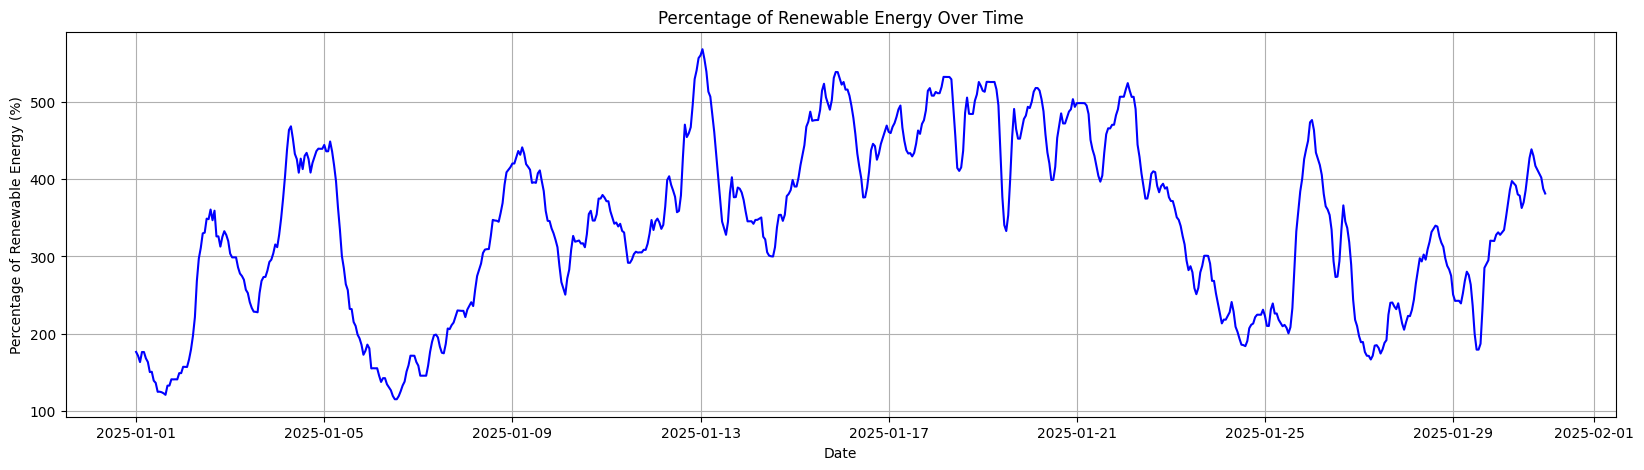

In [14]:
# Line chart for carbon intensity 
plt.figure(figsize=(20, 5))
plt.plot(ci1["startTime"], ci1["ci_default"], linestyle="-", color="blue")
plt.xlabel("Date")
plt.ylabel("Percentage of Renewable Energy (%)")
plt.title("Percentage of Renewable Energy Over Time")
plt.grid(True)
plt.show()

We can also compare carbon emission values with the percentage of green energy

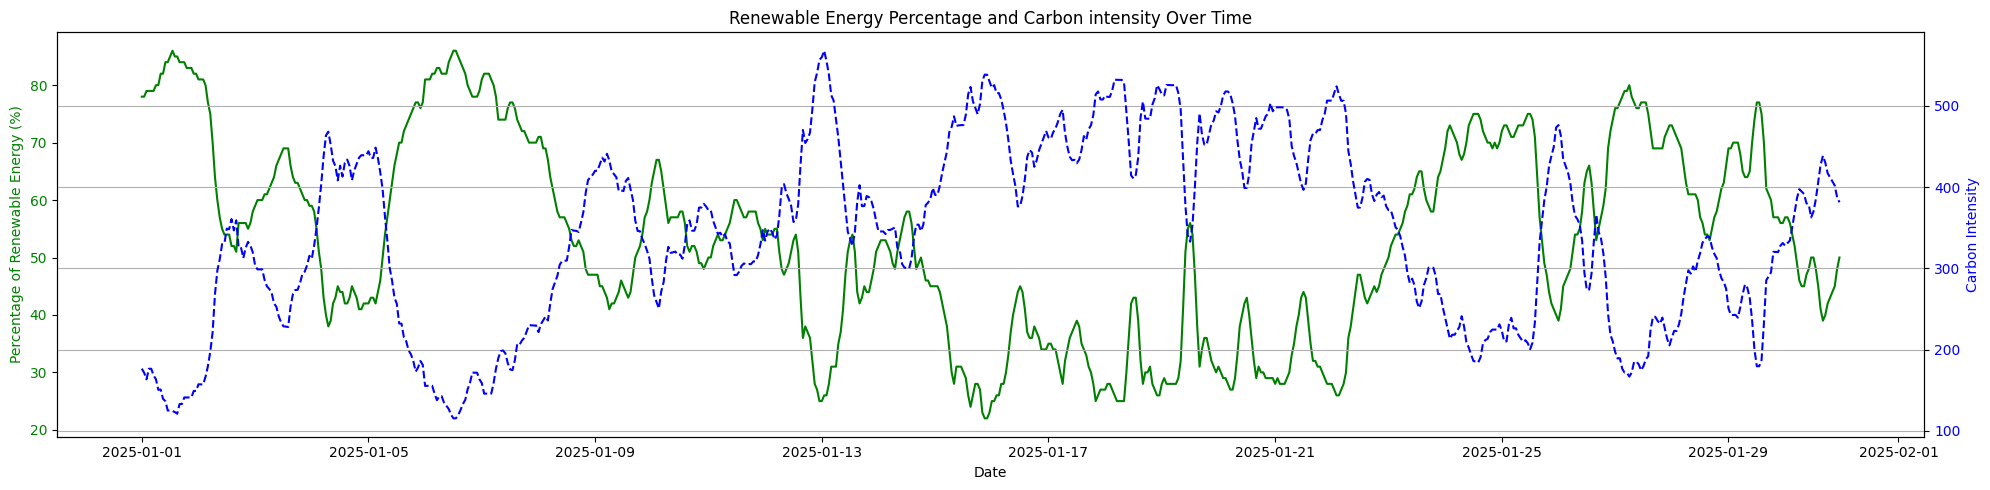

In [13]:
# Create a figure and a twin y-axis
fig, ax1 = plt.subplots(figsize=(20, 5))

# Plot percentage values on the first y-axis
ax1.set_xlabel("Date")
ax1.set_ylabel("Percentage of Renewable Energy (%)", color="green")
ax1.plot(de1["data"]["startTime"], de1["data"]["percentRenewable"],  color="green", label="Renewable Percentage")
ax1.tick_params(axis='y', labelcolor="green")

# Create a second y-axis for numerical values
ax2 = ax1.twinx()
ax2.set_ylabel("Carbon Intensity", color="blue")
ax2.plot(ci1["startTime"], ci1["ci_default"],  linestyle="--", color="blue", label="Carbon Intensity")
ax2.tick_params(axis='y', labelcolor="blue")

# Title and grid
plt.title("Renewable Energy Percentage and Carbon intensity Over Time")
fig.tight_layout()
plt.grid(True)
plt.show()

We can observe that a higher percentage of renewable energy corresponds to a lower carbon intensity value.

## Finding an optimal time to perform a computation

In the above plot we saw that the percentalge of green energy flutuates with time. For instance, solar energy can be generated in the presence of sun (and absence of clouds) which increases the amount of green energy sources duriung the day. Can we use this information to reduce our carbon emissons ?

One of the main source of carbon emissions due to computations is due to the fact that computers run on electricity. Since the carbon intensity of electricity varies, we can reduce our emissions if we use electricity when it's more "greener". 

Using the codegreen_core package you can find an optimal time to perform your computation (or even do your laundry!)




In the plot above, we observed that the percentage of green energy fluctuates over time. 
For instance, solar energy is generated in the presence of sunlight (and absence of clouds), which increases the share of green energy during the day. Can we use this information to reduce our carbon emissions?

One of the main source of carbon emissions from computations comes from the electricity that powers computers. 
Since the carbon intensity of electricity varies, we can reduce our emissions by using electricity when it's more "greener". 

With the `codegreen_core` package, you can identify the optimal time to run your computations — or even do your laundry!

In [19]:
from codegreen_core.tools.loadshift_time import predict_now
from datetime import datetime, timedelta

now = datetime.now()
print("It is currently ",now)
hard_finish_date = now + timedelta(days=1)

what_time = predict_now("DE",5,0,hard_finish_date)
time1 = datetime.fromtimestamp(what_time[0])
print("Start you computation at ",time1)

It is currently  2025-03-12 00:52:43.380853
2025-03-11 23:52:45.330405+00:00 2025-03-11 23:00:00+00:00 2025-03-12 04:00:00+00:00
alternative = 4
returning optimum
Start you computation at  2025-03-12 04:00:00


## Calculating carbon emissions of a compuational task

The question now is: How much emissions have you saved?

`codegreen_core` to the rescue!


Let’s take a look back in time to see if our optimal time suggestion actually works.

Assume you need to run some computations between January 1, 2025, and January 3, 2025.

Let’s first gather the historical forecast data.

In [20]:
hist1 = energy("DE",datetime(2025,1,1),datetime(2025,1,3),"forecast")

Let's say you want to run some code for 5 hours. 

Beside current time, `codegreen_core` will also allow you to predict optimal time in the past. Please see the documentaiton for more

In [34]:
from codegreen_core.tools.loadshift_time import predict_optimal_time
from datetime import datetime, timedelta

runtime = 5
option1 = datetime(2025,1,1)

hard_finish_date1 = option1 + timedelta(days=1)
hard_finish_date2 = option1 + timedelta(days=2)
print("option 1 : ",option1)

what_time1 = predict_optimal_time(hist1["data"],runtime,0,hard_finish_date1,option1)
option2 = datetime.fromtimestamp(what_time1[0])
print("option 2 : ",option2)

what_time2 = predict_optimal_time(hist1["data"],runtime,0,hard_finish_date2,option1+timedelta(hours=12))
option3 = datetime.fromtimestamp(what_time2[0])
print("option 3 :",option3)


option 1  2025-01-01 00:00:00
2024-12-31 23:00:00+00:00 2024-12-31 23:00:00+00:00 2025-01-01 04:00:00+00:00
alternative = 5
returning optimum
option 2  2025-01-01 05:00:00
2025-01-01 11:00:00+00:00 2025-01-01 11:00:00+00:00 2025-01-01 16:00:00+00:00
alternative = -5
option 3  2025-01-01 12:00:00


Now that we have our optimal time, let's calculate the carbon emissions for each case. Carbon emissions depend on two factors: the energy used and the hardware specifications. So, we need details about the server you will be using including :
- `number_core` (int): The number of CPU cores.
- `memory_gb` (float): The size of memory available in Gigabytes.
- `power_draw_core` (float): Power draw of a computing core in Watts.
- `usage_factor_core` (float): The core usage factor, a value between 0 and 1.
- `power_draw_mem` (float): Power draw of memory in Watts.
- `power_usage_efficiency` (float): Efficiency coefficient of the data center.

(Skip any values you cannot find, and the default values will be used.)

/Users/svj/projects/codegreen/core/codegreen_core/tools/carbon_emission.py:196: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ci_data["carbon_emission"] = ci_data["ci_default"] * e_hour
/Users/svj/projects/codegreen/core/codegreen_core/tools/carbon_emission.py:196: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ci_data["carbon_emission"] = ci_data["ci_default"] * e_hour
/Users/svj/projects/codegreen/core/codegreen_core/tools/carbon_emission.py:196: SettingWithCopyWarning: 
A value is trying to be set on a co

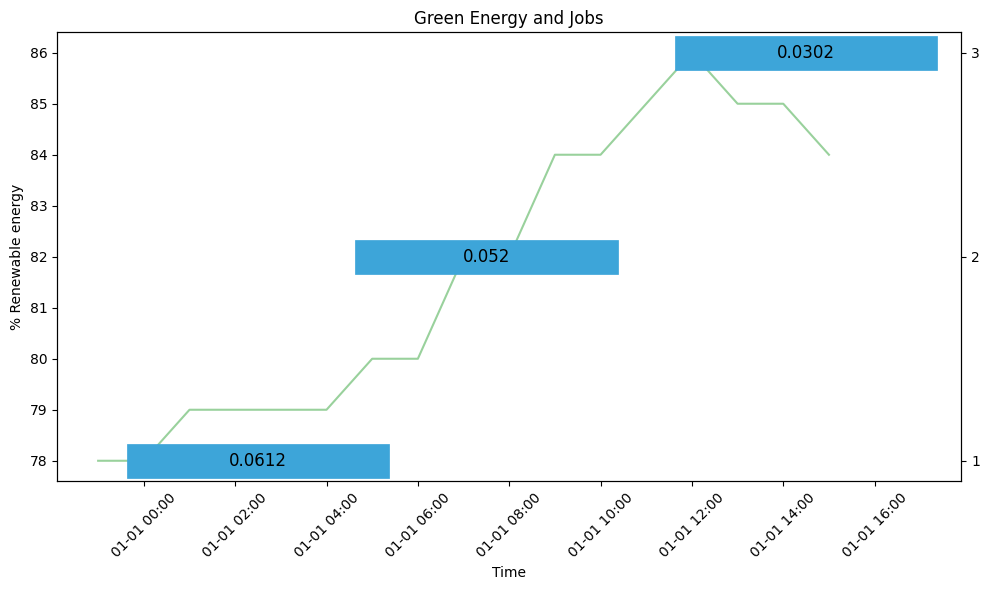

In [41]:
from codegreen_core.tools.carbon_emission import plot_ce_jobs
server = {
    "country":"DE",
    "number_core":8,
    "memory_gb": 24,
}
jobs = [
    {"start_time": option1, "runtime_minutes": runtime*60},
    {"start_time": option2, "runtime_minutes": runtime*60},
    {"start_time": option3, "runtime_minutes": runtime*60},    
]

plot_ce_jobs(server,jobs)